# Analysis : Indian Company Employment and Salary Insights Dataset

# V. Aditya Bharadwaj

**In this project, we’ll explore and analyze a dataset containing details about:** 
**different companies, including their ratings, reviews, salaries, benefits, and job availability.**

**Main goal is to understand and analyze factors such as company ratings, employee reviews, and salary levels — relate to each other**

1. Identify the top-rated and high-paying companies

2. Understand what employees appreciate the most in their workplace

3. Explore how job openings, interviews, and benefits vary across companies

4. Practice big data handling using Apache Spark (PySpark) in Jupyter Notebook

In [5]:
# Configuring all the required versions 

In [1]:
!python --version

Python 3.13.5


In [2]:
!spark-submit --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 4.0.1
      /_/
                        
Using Scala version 2.13.16, Java HotSpot(TM) 64-Bit Server VM, 17.0.12
Branch HEAD
Compiled by user runner on 2025-09-02T03:10:51Z
Revision 29434ea766b0fc3c3bf6eaadb43a8f931133649e
Url https://github.com/apache/spark
Type --help for more information.


In [3]:
import pyspark
print("PySpark version:", pyspark.__version__)

PySpark version: 4.0.1


In [3]:
#establishing spark session

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Company_Data_Analysis") \
    .getOrCreate()

print("Spark Session created successfully")
print("Spark Version:", spark.version)

Spark Session created successfully
Spark Version: 4.0.1


In [4]:
# Loading the dataset and reading it

file_path = r"C:\Users\adity\OneDrive\Desktop\Spark\Indian Company Employment and Salary Insights Dataset\companies.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)
data.show(10)


+-------------+--------------------+-------+--------------------+--------------------+-------------+----------+----------------+--------------------+--------------+
| Company_name|         Description|Ratings|    Highly_rated_for|Critically_rated_for|Total_reviews|Avg_salary|Interviews_taken|Total_jobs_available|Total_benefits|
+-------------+--------------------+-------+--------------------+--------------------+-------------+----------+----------------+--------------------+--------------+
|          TCS|IT Services & Con...|    3.8|Job Security, Wor...|Promotions / Appr...|        73.1k|    856.9k|            6.1k|                 847|         11.5k|
|    Accenture|IT Services & Con...|    4.0|Company Culture, ...|                NULL|        46.4k|    584.6k|            4.3k|                9.9k|          7.1k|
|    Cognizant|IT Services & Con...|    3.9|Skill Development...|Promotions / Appr...|        41.7k|    561.5k|            3.6k|                 460|          5.8k|
|        W

In [5]:
#Understanding the logical structure of the dataset
data.printSchema()

root
 |-- Company_name: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Ratings: double (nullable = true)
 |-- Highly_rated_for: string (nullable = true)
 |-- Critically_rated_for: string (nullable = true)
 |-- Total_reviews: string (nullable = true)
 |-- Avg_salary: string (nullable = true)
 |-- Interviews_taken: string (nullable = true)
 |-- Total_jobs_available: string (nullable = true)
 |-- Total_benefits: string (nullable = true)



In [6]:
# Checking the basic info

print(f"Total Rows: {data.count()}")
print(f"\nTotal Columns: {len(data.columns)}")
print("\nColumn Names:", data.columns)



Total Rows: 10000

Total Columns: 10

Column Names: ['Company_name', 'Description', 'Ratings', 'Highly_rated_for', 'Critically_rated_for', 'Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']


In [7]:
data.describe().show()

+-------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+------------------+------------------+--------------------+------------------+
|summary|        Company_name|         Description|            Ratings|    Highly_rated_for|Critically_rated_for|     Total_reviews|        Avg_salary|  Interviews_taken|Total_jobs_available|    Total_benefits|
+-------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+------------------+------------------+--------------------+------------------+
|  count|               10000|               10000|              10000|                9908|                2807|             10000|             10000|             10000|               10000|             10000|
|   mean|                NULL|                NULL|  3.894709999999992|                NULL|                NULL|208.45992694456382| 547.1170247395834|20.48

In [8]:
# Checking if the data is clean 

#Checking if any null values are present
from pyspark.sql.functions import col, sum

data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns]).show()

+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+
|Company_name|Description|Ratings|Highly_rated_for|Critically_rated_for|Total_reviews|Avg_salary|Interviews_taken|Total_jobs_available|Total_benefits|
+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+
|           0|          0|      0|              92|                7193|            0|         0|               0|                   0|             0|
+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+



## Data cleaning

In [9]:
from pyspark.sql.functions import col, when

# Fill missing values with placeholders
data = data.fillna({
    "Highly_rated_for": "Not specified",
    "Critically_rated_for": "Not specified"
})


In [10]:
# Verification
data.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in ["Highly_rated_for", "Critically_rated_for"]]
).show()

+----------------+--------------------+
|Highly_rated_for|Critically_rated_for|
+----------------+--------------------+
|               0|                   0|
+----------------+--------------------+



In [11]:
data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns]).show()

+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+
|Company_name|Description|Ratings|Highly_rated_for|Critically_rated_for|Total_reviews|Avg_salary|Interviews_taken|Total_jobs_available|Total_benefits|
+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+
|           0|          0|      0|               0|                   0|            0|         0|               0|                   0|             0|
+------------+-----------+-------+----------------+--------------------+-------------+----------+----------------+--------------------+--------------+



In [12]:
# No missing values now

## Insights from the Dataset

In [13]:
#Top 10 Highest Rated Companies
data.select("Company_name", "Ratings") \
    .orderBy(col("Ratings").desc()) \
    .show(10)


+--------------------+-------+
|        Company_name|Ratings|
+--------------------+-------+
| Lavender Technology|    5.0|
|           InternEzy|    5.0|
|Royal Migration S...|    5.0|
|      Stirring Minds|    5.0|
|Dr.SNS Rajalakshm...|    5.0|
|   Matrimonialsindia|    5.0|
|Deejos Engineers ...|    5.0|
|          IBC Techno|    5.0|
|         Teqtous Inc|    5.0|
|Jayasree Techno S...|    5.0|
+--------------------+-------+
only showing top 10 rows


In [14]:
#Highest Average Salary by company 

data.select("Company_name", "Avg_salary") \
    .orderBy(col("Avg_salary").desc()) \
    .show(10)

+--------------------+----------+
|        Company_name|Avg_salary|
+--------------------+----------+
|           Tietoevry|        9k|
|QualityKiosk Tech...|        9k|
|Happiest Minds Te...|        9k|
|               Ricoh|       999|
|MARK EXHAUST SYSTEMS|       999|
|  Savex Technologies|       999|
|           GSH Group|       998|
|      Rehau Polymers|       998|
|Umedica Laboratories|       998|
|           KLJ GROUP|       997|
+--------------------+----------+
only showing top 10 rows


In [15]:
#Most Reviewed Companies

data.select("Company_name", "Total_reviews") \
    .orderBy(col("Total_reviews").desc()) \
    .show(10)

+--------------------+-------------+
|        Company_name|Total_reviews|
+--------------------+-------------+
|              Aircel|          999|
|           Cinépolis|          999|
|                 IFB|          997|
|Unichem Laboratories|          997|
|           Synchrony|          995|
|Iffco Tokio Gener...|          994|
|     Indoco Remedies|          993|
|         CorroHealth|          991|
| T.R. Sawhney Motors|           99|
|   Marc Laboratories|           99|
+--------------------+-------------+
only showing top 10 rows


In [16]:
#Companies with Most Job Openings

data.select("Company_name", "Total_jobs_available") \
    .orderBy(col("Total_jobs_available").desc()) \
    .show(10)

+--------------------+--------------------+
|        Company_name|Total_jobs_available|
+--------------------+--------------------+
|               2COMS|                  99|
|          Innovaccer|                  99|
|          Turtlemint|                  99|
|              Aranca|                  99|
| Indiamart Intermesh|                 981|
|  Poonawalla Fincorp|                  98|
|             Xoriant|                  98|
|       Allegis Group|                  98|
|Spectro Analytica...|                  98|
|              Cybage|                  97|
+--------------------+--------------------+
only showing top 10 rows


In [18]:

from pyspark.sql.functions import regexp_replace, when, col, length

# Step 1: Clean salary strings and handle suffixes like k, L, Cr
data = (
    data.withColumn("Avg_salary_clean", regexp_replace(col("Avg_salary"), "₹|,|\\s", ""))  # remove ₹, commas, spaces
    .withColumn(
        "Avg_salary_clean",
        when(col("Avg_salary_clean").endswith("k"), regexp_replace(col("Avg_salary_clean"), "k", "").cast("double") * 1000)
        .when(col("Avg_salary_clean").endswith("L"), regexp_replace(col("Avg_salary_clean"), "L", "").cast("double") * 100000)
        .when(col("Avg_salary_clean").endswith("Cr"), regexp_replace(col("Avg_salary_clean"), "Cr", "").cast("double") * 10000000)
        .otherwise(col("Avg_salary_clean").cast("double"))
    )
)

# Step 2: Verify results
data.select("Company_name", "Avg_salary", "Avg_salary_clean").show(20)


+--------------------+----------+----------------+
|        Company_name|Avg_salary|Avg_salary_clean|
+--------------------+----------+----------------+
|                 TCS|    856.9k|        856900.0|
|           Accenture|    584.6k|        584600.0|
|           Cognizant|    561.5k|        561500.0|
|               Wipro|    427.4k|        427400.0|
|           Capgemini|    414.4k|        414400.0|
|           HDFC Bank|    132.3k|        132300.0|
|          ICICI Bank|    143.6k|        143600.0|
|             Infosys|      462k|        462000.0|
|             HCLTech|    293.4k|        293400.0|
|       Tech Mahindra|    251.3k|        251300.0|
|             Genpact|    190.4k|        190400.0|
|           Axis Bank|     97.9k|         97900.0|
|     Teleperformance|       84k|         84000.0|
|Concentrix Corpor...|    105.4k|        105400.0|
|                 Jio|     67.3k|         67300.0|
|              Amazon|    125.2k|        125200.0|
|                 IBM|    221.5

## Ploting and Data visualization

In [19]:
# importing DV based libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

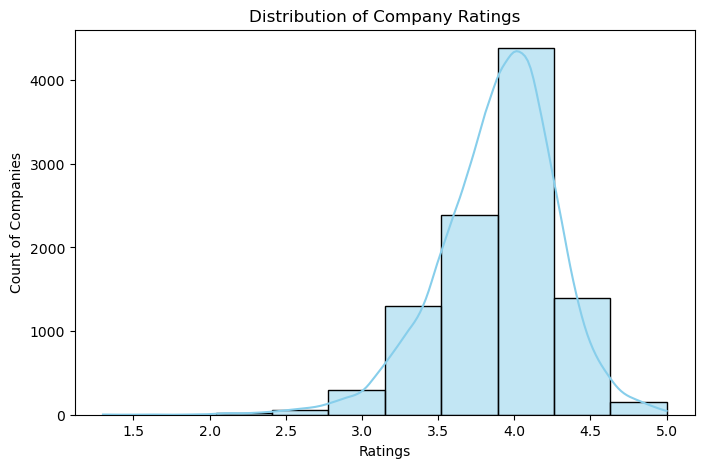

In [25]:
# Distribution of Company Ratings
pdf = data.select("Ratings").dropna().toPandas()

plt.figure(figsize=(8,5))
sns.histplot(pdf["Ratings"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Company Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count of Companies")
plt.show()

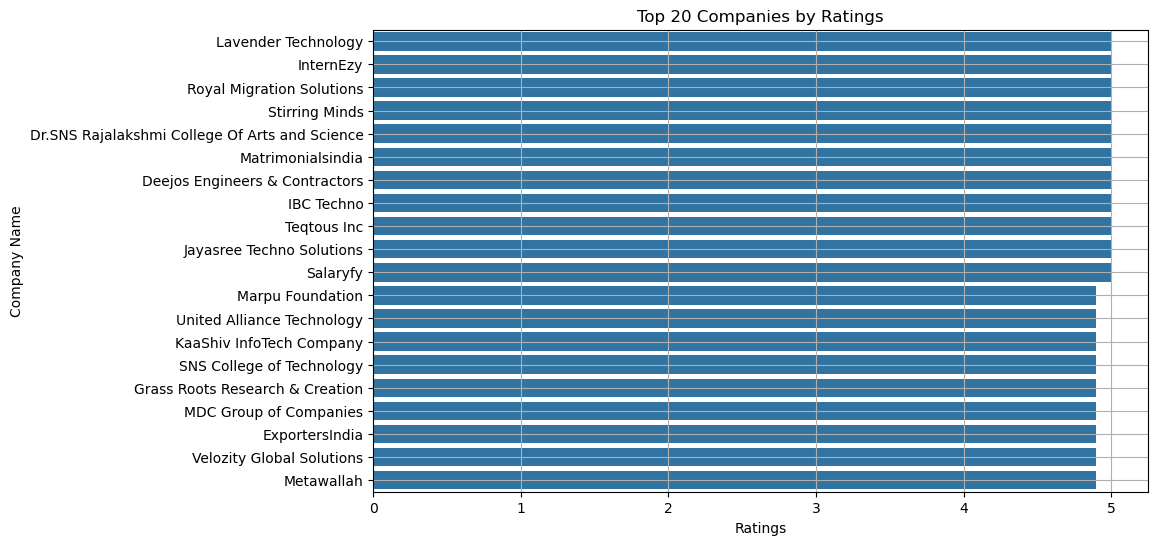

In [33]:
#Top 20 companies by ratings

top_rated = data.select("Company_name", "Ratings") \
                .dropna(subset=["Ratings"]) \
                .orderBy(col("Ratings").desc()) \
                .limit(20) \
                .toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="Ratings", y="Company_name", data=top_rated)
plt.title("Top 20 Companies by Ratings")
plt.xlabel("Ratings")
plt.ylabel("Company Name")
plt.grid('on')
plt.show()

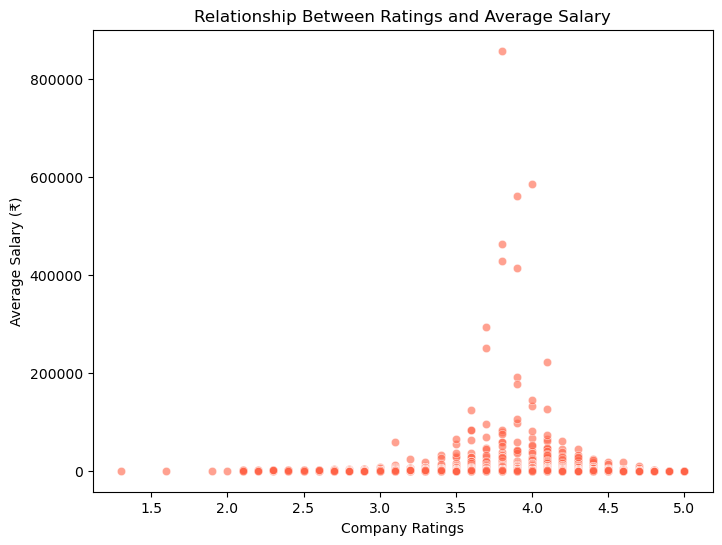

In [34]:
#Ratings vs. Average Salary Trend

salary_ratings = data.select("Company_name", "Ratings", "Avg_salary_clean") \
                     .dropna(subset=["Ratings", "Avg_salary_clean"]) \
                     .toPandas()

plt.figure(figsize=(8,6))
sns.scatterplot(data=salary_ratings, x="Ratings", y="Avg_salary_clean", alpha=0.6, color="tomato")
plt.title("Relationship Between Ratings and Average Salary")
plt.xlabel("Company Ratings")
plt.ylabel("Average Salary (₹)")
plt.show()

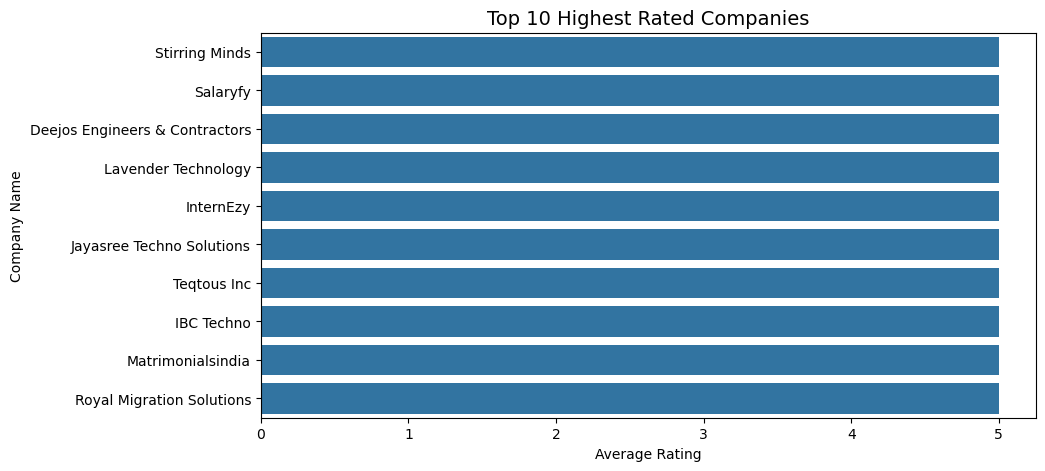

In [47]:
#Top 10 Highest rated companies

pdf = data.select("Company_name", "Ratings").toPandas()

# Drop missing or invalid values
pdf = pdf.dropna(subset=["Ratings"])
pdf = pdf[pdf["Ratings"] != "--"]

# Convert ratings to numeric safely
pdf["Ratings"] = pd.to_numeric(pdf["Ratings"], errors="coerce")

# Sort and select top 10
top_rated = pdf.sort_values(by="Ratings", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Ratings", y="Company_name", data=top_rated)
plt.title("Top 10 Highest Rated Companies", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Company Name")
plt.show()

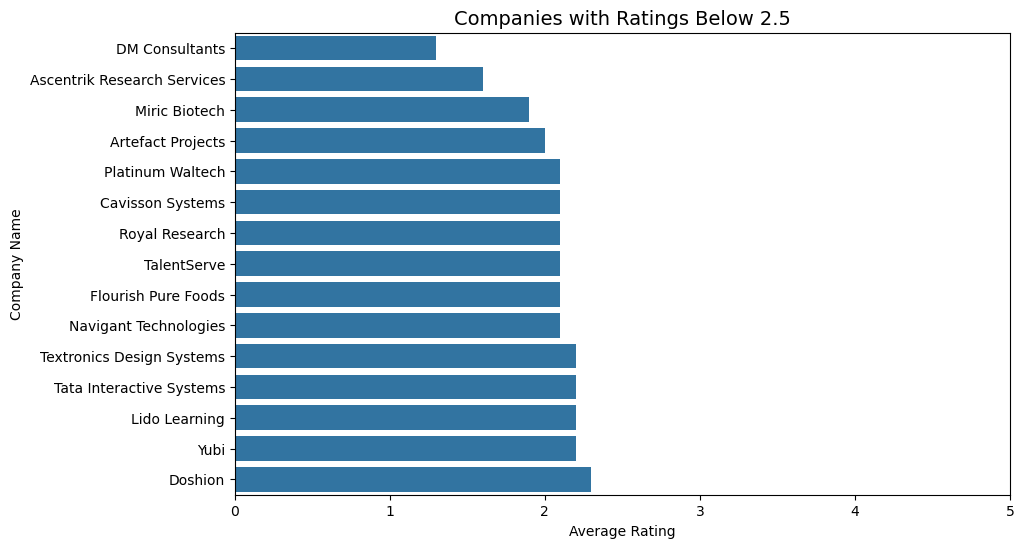

In [49]:
# Companies having > 2.5 ratings (Below avg)

pdf = data.select("Company_name", "Ratings").toPandas()

# Drop null or invalid ratings
pdf = pdf.dropna(subset=["Ratings"])
pdf = pdf[pdf["Ratings"] != "--"]

# Convert ratings to numeric safely
pdf["Ratings"] = pd.to_numeric(pdf["Ratings"], errors="coerce")

# Filter companies with low ratings
low_rated = pdf[pdf["Ratings"] < 2.5].sort_values(by="Ratings", ascending=True)

# Keep only first 15 for readability
low_rated = low_rated.head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Ratings", y="Company_name", data=low_rated)
plt.title("Companies with Ratings Below 2.5", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Company Name")
plt.xlim(0, 5)
plt.show()

In [51]:
# Companies (top 5) having ratings specifically on job security feature

pdf = data.select("Company_name", "Critically_rated_for").toPandas()

# Drop missing values
pdf = pdf.dropna(subset=["Critically_rated_for"])

# Filter rows where 'Critically_rated_for' mentions 'Job Security'
job_security_issues = pdf[pdf["Critically_rated_for"].str.contains("Job Security", case=False, na=False)]

# Count how many times each company is criticized for Job Security
job_security_count = (
    job_security_issues["Company_name"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Company_name", "Company_name": "Count"})
)

# Select Top 5 companies
top5_job_security = job_security_count.head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Company_name", data=top5_job_security)
plt.title("Top 5 Companies Criticized for Job Security", fontsize=14)
plt.xlabel("Number of Mentions (Critically Rated for Job Security)")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Company_name` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>